Step 1. Download the NBA data (nba.csv) from HuskyCT which is available in the directory,
called “Data Files”. This file is in csv format. You are using the height column only.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cbook import boxplot_stats
from scipy import stats as scipy_stats

# Column Index is Found to be four in the CSV, so we can just strip it from string form, 
# Perform some splits, and do some filtering
with open('nba.csv', 'r') as nbafile:
    nba_list_content = [item.split(',') for item in nbafile.read().split('\n')]

HEIGHT_COLUMN_INDEX = 4
nba_player_heights = []

for item in nba_list_content:
    try:
        nba_player_heights.append(int(item[HEIGHT_COLUMN_INDEX]))
                     
    except Exception:
        continue

Step 2. Compute the mean and standard deviation of the NBA players, say, mu and sigma, Respectively.

In [3]:
nba_player_height_mean = np.mean(nba_player_heights)
nba_player_height_stdev = np.std(nba_player_heights)

# Median will be useful later
nba_player_height_median = np.median(nba_player_heights)

print(f'Mean: {nba_player_height_mean}, Median: {nba_player_height_median}, StDev: {nba_player_height_stdev}')

Mean: 79.27133479212254, Median: 80.0, StDev: 3.4761942789089746


Step 3. Create a normalized histogram summarizing the NBA player’s height distribution.
Normalized histogram will have a total area 1. Normalized histogram can be achieved by
dividing the number of occurrence of each bin by the total number of samples (area).

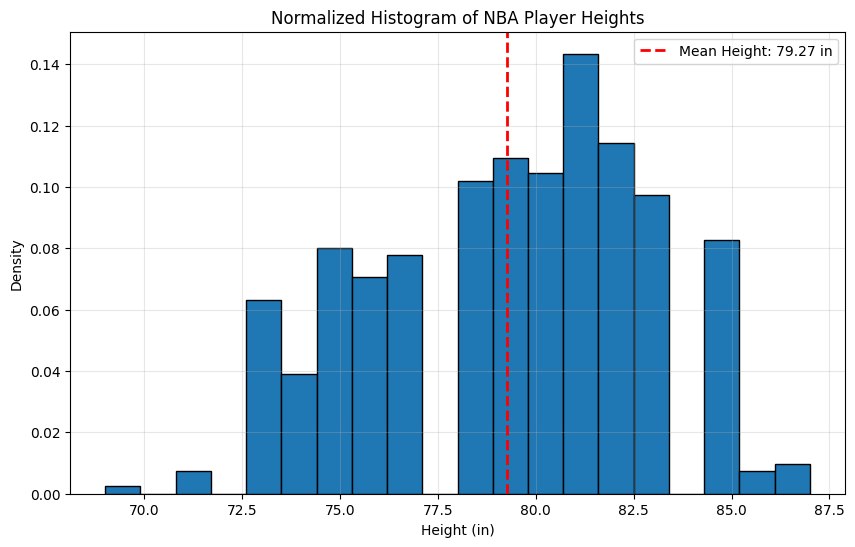

In [5]:
# Histogram Initialization with 20 bins -- we use density for normalization
plt.figure(figsize=(10, 6))
plt.hist(nba_player_heights, bins=20, density=True, edgecolor='black')

plt.title('Normalized Histogram of NBA Player Heights')
plt.xlabel('Height (in)')
plt.ylabel('Density')

# Additive Descriptors in order to show histogram mean within context
plt.axvline(nba_player_height_mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean Height: {nba_player_height_mean:.2f} in')
plt.legend()
plt.grid(True, alpha=0.3)

plt.show()
plt.close()

Step 4. Show the distribution using boxplot.

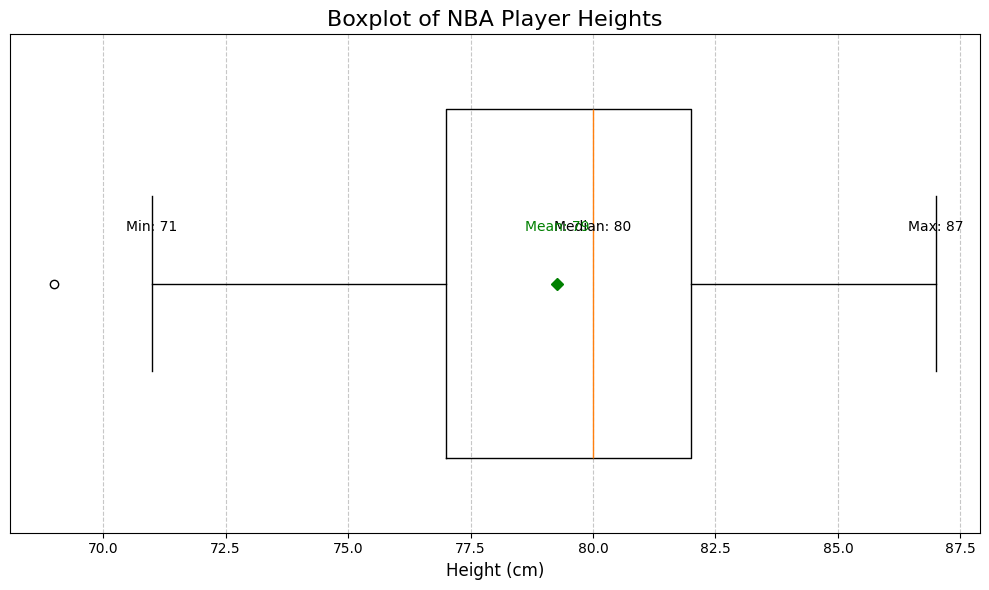

In [12]:
#Boxplot initialization
fig, ax = plt.subplots(figsize=(10, 6))

bp = ax.boxplot(nba_player_heights, vert=False, widths=0.7, showmeans=True, meanprops={"marker":"D", "markeredgecolor":"green", "markerfacecolor":"green"})

ax.set_title('Boxplot of NBA Player Heights', fontsize=16)
ax.set_xlabel('Height (cm)', fontsize=12)
ax.set_yticks([])
ax.grid(True, axis='x', linestyle='--', alpha=0.7)

stats = boxplot_stats(nba_player_heights)[0]
nba_min_val, nba_max_val, nba_median = (stats['whislo'], stats['whishi'], stats['med']) 

#Descriptors
ax.text(nba_min_val, 1.1, f'Min: {nba_min_val:.0f}', ha='center', va='bottom')
ax.text(nba_max_val, 1.1, f'Max: {nba_max_val:.0f}', ha='center', va='bottom')
ax.text(nba_player_height_median, 1.1, f'Median: {nba_player_height_median:.0f}', ha='center', va='bottom')
ax.text(nba_player_height_mean, 1.1, f'Mean: {nba_player_height_mean:.0f}', ha='center', va='bottom', color='green')

plt.tight_layout()
plt.show()
plt.close()

Step 5. Show the distribution using violinplot.

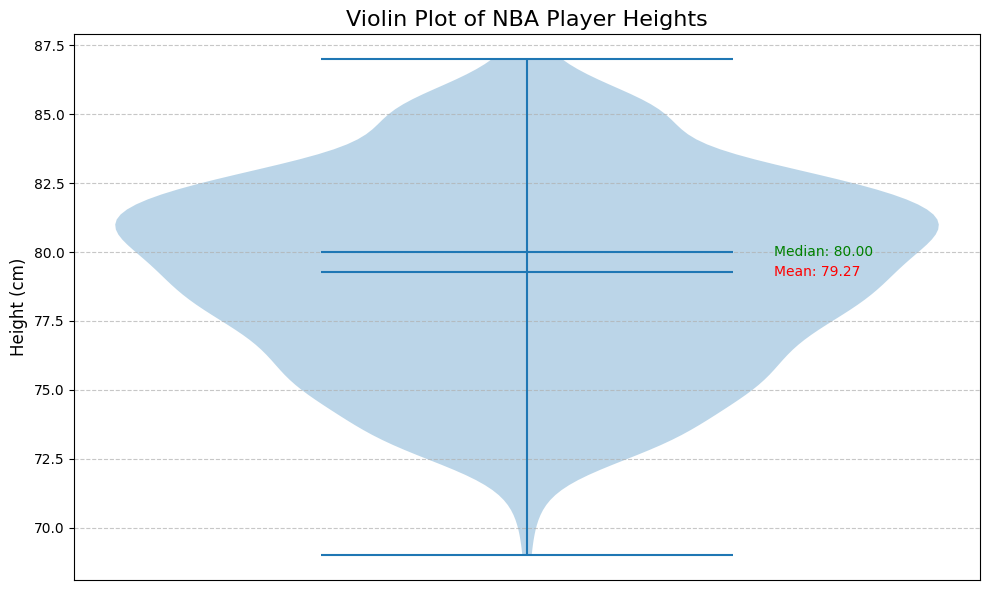

In [13]:
#Violinplot Initilization -- for reference how much description do you want in future homeworks?
fig, ax = plt.subplots(figsize=(10, 6))
parts = ax.violinplot(nba_player_heights, vert=True, showmeans=True, showmedians=True)

ax.set_title('Violin Plot of NBA Player Heights', fontsize=16)
ax.set_ylabel('Height (cm)', fontsize=12)
ax.set_xticks([])

ax.text(1.15, nba_player_height_mean, f'Mean: {nba_player_height_mean:.2f}', verticalalignment='center', color='red')
ax.text(1.15, nba_player_height_median, f'Median: {nba_player_height_median:.2f}', verticalalignment='center', color='green')

ax.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
plt.close()

Step 6. Convert the histogram you created in Step 3 using z values for the heights of the players. Z-score graph should be also normalized.


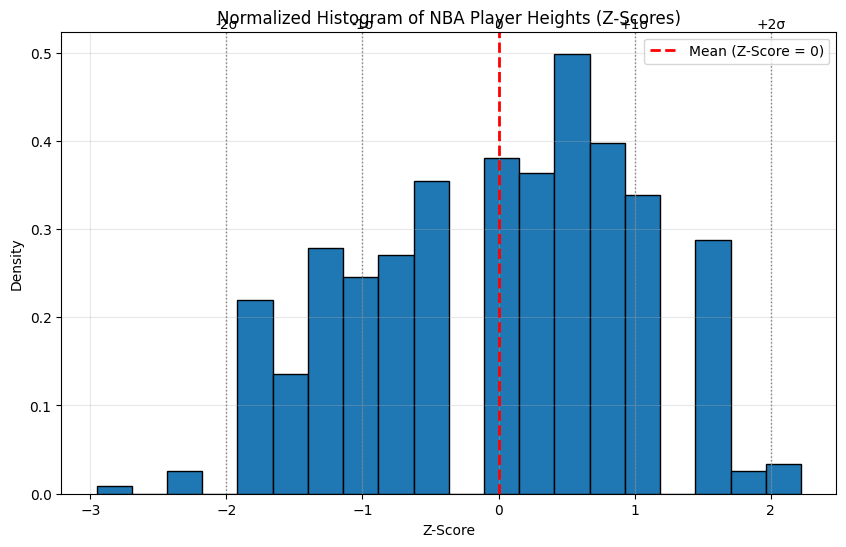

In [15]:
z_scores = scipy_stats.zscore(nba_player_heights)

plt.figure(figsize=(10, 6))
plt.hist(z_scores, bins=20, density=True, edgecolor='black')

plt.title('Normalized Histogram of NBA Player Heights (Z-Scores)')
plt.xlabel('Z-Score')
plt.ylabel('Density')

plt.axvline(0, color='red', linestyle='dashed', linewidth=2, label='Mean (Z-Score = 0)')

plt.legend()
plt.grid(True, alpha=0.3)

plt.text(-1, plt.gca().get_ylim()[1], '-1σ', ha='center', va='bottom')
plt.text(0, plt.gca().get_ylim()[1], '0', ha='center', va='bottom')
plt.text(1, plt.gca().get_ylim()[1], '+1σ', ha='center', va='bottom')
plt.text(-2, plt.gca().get_ylim()[1], '-2σ', ha='center', va='bottom')
plt.text(2, plt.gca().get_ylim()[1], '+2σ', ha='center', va='bottom')

for i in range(-2, 3):
    if i != 0:
        plt.axvline(i, color='gray', linestyle=':', linewidth=1)

plt.show()
plt.close()

Step 7. Create a normal distribution graph using mu and sigma you created in Step 2 and overlay it on the normalized histogram you created in Step 3. You can do this using matplotlib.pyplots.subplots.

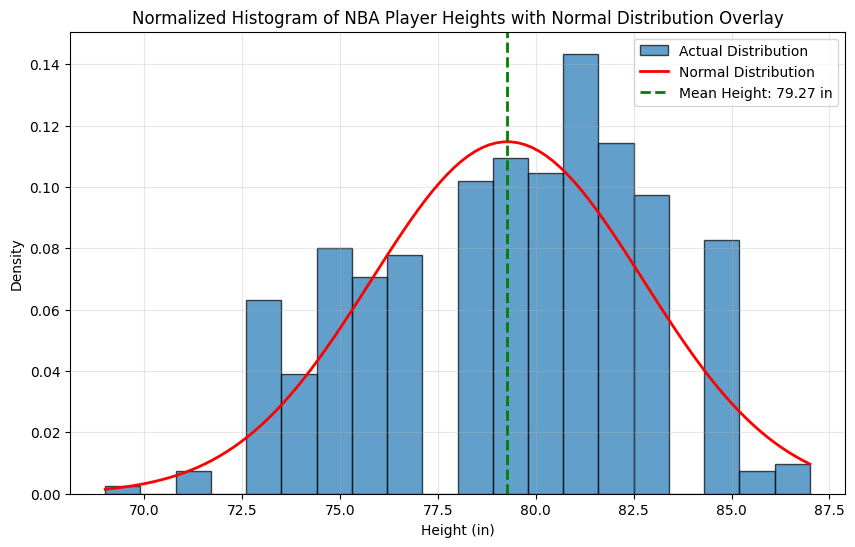

In [16]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.hist(nba_player_heights, bins=20, density=True, edgecolor='black', alpha=0.7, label='Actual Distribution')

x = np.linspace(min(nba_player_heights), max(nba_player_heights), 100)
y = scipy_stats.norm.pdf(x, nba_player_height_mean, nba_player_height_stdev)

ax.plot(x, y, 'r-', linewidth=2, label='Normal Distribution')

ax.set_title('Normalized Histogram of NBA Player Heights with Normal Distribution Overlay')
ax.set_xlabel('Height (in)')
ax.set_ylabel('Density')

ax.axvline(nba_player_height_mean, color='green', linestyle='dashed', linewidth=2, label=f'Mean Height: {nba_player_height_mean:.2f} in')

ax.legend()
ax.grid(True, alpha=0.3)

plt.show()
plt.close()

Step 8. Create a normal distribution graph using mu and sigma you created in Step 2 and overlay it on the normalized z-score, you created in Step 6. You can do this using
Matplotlib.pyplots.subplots.

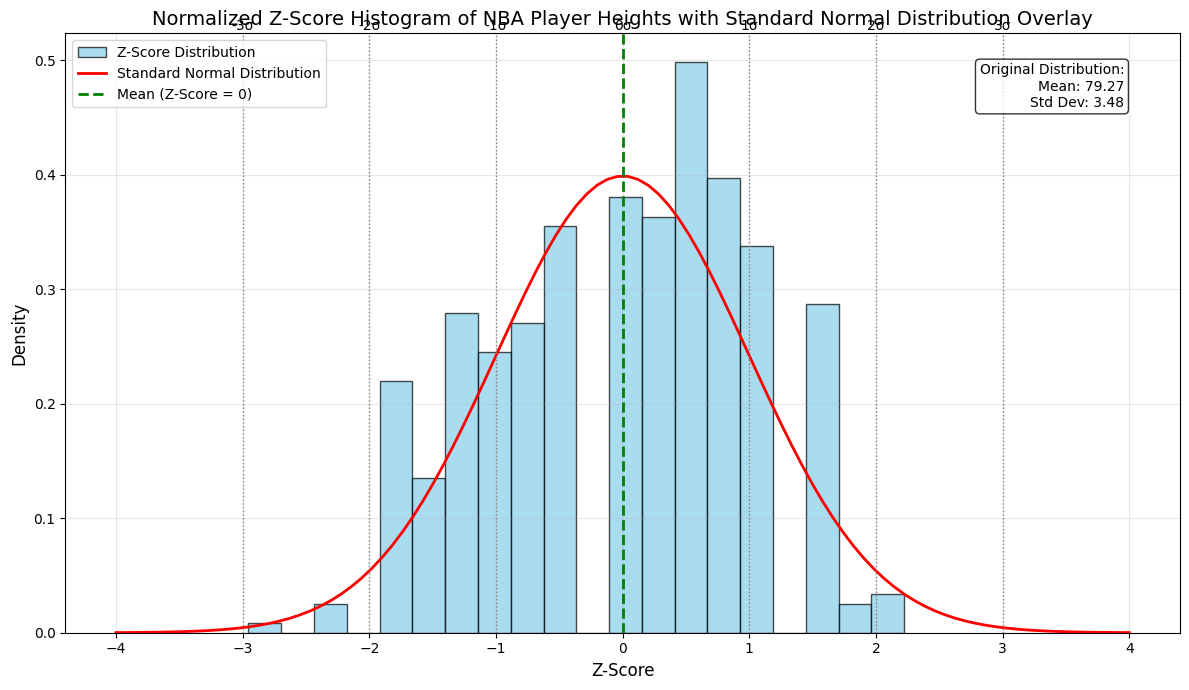

In [17]:
fig, ax = plt.subplots(figsize=(12, 7))

ax.hist(z_scores, bins=20, density=True, alpha=0.7, color='skyblue', edgecolor='black', label='Z-Score Distribution')
x = np.linspace(-4, 4, 100)
y = scipy_stats.norm.pdf(x, 0, 1)
ax.plot(x, y, 'r-', linewidth=2, label='Standard Normal Distribution')

ax.set_title('Normalized Z-Score Histogram of NBA Player Heights with Standard Normal Distribution Overlay', fontsize=14)
ax.set_xlabel('Z-Score', fontsize=12)
ax.set_ylabel('Density', fontsize=12)

for i in range(-3, 4):
    if i != 0:
        ax.axvline(i, color='gray', linestyle=':', linewidth=1)
    ax.text(i, ax.get_ylim()[1], f'{i}σ', ha='center', va='bottom')

ax.axvline(0, color='green', linestyle='--', linewidth=2, label='Mean (Z-Score = 0)')

ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)

stats_text = f'Original Distribution:\nMean: {nba_player_height_mean:.2f}\nStd Dev: {nba_player_height_stdev:.2f}'
ax.text(0.95, 0.95, stats_text, transform=ax.transAxes, fontsize=10, verticalalignment='top', horizontalalignment='right',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()

plt.show()
plt.close()